In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import traj_classification as tc

reload(tc)

<module 'traj_classification' from 'traj_classification.py'>

In [3]:
import csv
data = []
with open('Z://transamp//PNPvsPhase_250MSperSec_2p7dB_20170509_1648//PNPvsphase_250MSperSec_2p7dBTA_15dBJPA_4VppWM_169deg_I', 'r') as f:
    data_reader = csv.reader(f, delimiter='\t', quotechar='|')
    for line in data_reader:
        data.append([float(x) for x in line])
        
datarawI=np.array(data)
data0I=np.array(data)[1::2]
data1I=np.array(data)[0::2]

data = []
with open('Z://transamp//PNPvsPhase_250MSperSec_2p7dB_20170509_1648//PNPvsphase_250MSperSec_2p7dBTA_15dBJPA_4VppWM_169deg_Q', 'r') as f:
    data_reader = csv.reader(f, delimiter='\t', quotechar='|')
    for line in data_reader:
        data.append([float(x) for x in line])
        
datarawQ=np.array(data)
data0Q=np.array(data)[1::2]
data1Q=np.array(data)[0::2]


n=datarawI.shape[0]

labels=np.ones(datarawI.shape[0])
labels[1::2]=labels[1::2]*0


dataIQ1=np.stack([data1I,data1Q],axis=0)

dataIQ=np.stack([datarawI,datarawQ],axis=0)

In [4]:
n_train=dataIQ.shape[1]-5000

traj_train=dataIQ[:,:n_train]
labels_train=labels[:n_train]

traj_test=dataIQ[:,n_train:]
labels_test=labels[n_train:]

In [7]:
print traj_train.shape
print labels_train.shape
print traj_test.shape
print labels_test.shape

(2L, 55000L, 125L)
(55000L,)
(2L, 5000L, 125L)
(5000L,)


[ 1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.
  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.]


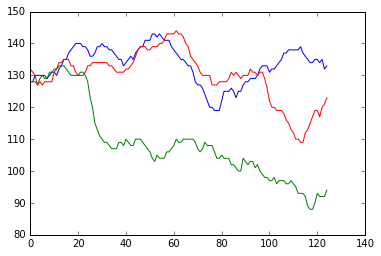

In [17]:
plt.plot(traj_train[0,1,:])
plt.plot(traj_train[0,2,:])
plt.plot(traj_train[0,7,:])

print labels_train[:100]

Tuning C...
On C = 1e-05 ; validation fid = 0.960778382738
On C = 1.43844988829e-05 ; validation fid = 0.961322847348
On C = 2.06913808111e-05 ; validation fid = 0.961322516769
On C = 2.97635144163e-05 ; validation fid = 0.961866981378
On C = 4.28133239872e-05 ; validation fid = 0.962139213683
On C = 6.15848211066e-05 ; validation fid = 0.962411115409
On C = 8.8586679041e-05 ; validation fid = 0.962228635467
On C = 0.00012742749857 ; validation fid = 0.962500867771
On C = 0.000183298071083 ; validation fid = 0.962682025395
On C = 0.000263665089873 ; validation fid = 0.962772769497
On C = 0.000379269019073 ; validation fid = 0.9629542577
On C = 0.000545559478117 ; validation fid = 0.962863513598
On C = 0.000784759970351 ; validation fid = 0.9629542577
On C = 0.00112883789168 ; validation fid = 0.9629542577
On C = 0.00162377673919 ; validation fid = 0.963045001802
On C = 0.00233572146909 ; validation fid = 0.963045001802
On C = 0.00335981828628 ; validation fid = 0.963045001802
On C = 0.

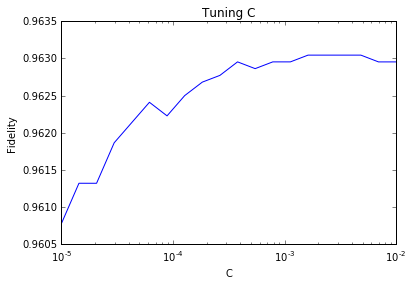

test fid:  0.9546


In [60]:
clf1 = tc.SWInt_SVM(slotSize=5)
clf1.fit(traj_train, labels_train)

print 'test fid: ', clf1.score(traj_test, labels_test)
predlabel1=clf1.predict(traj_test)

trainFid_ggexc_I:  0.958054545455
decBound_ggexc_I:  -0.989460150158


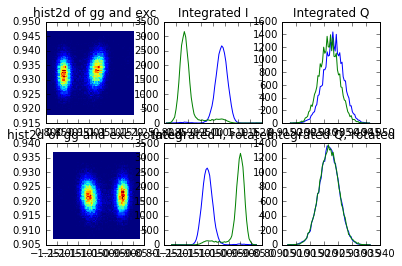

test fid:  0.9484


In [55]:
clf2 = tc.NaiveInt()
clf2.fit(traj_train, labels_train)

print 'test fid: ', clf2.score(traj_test, labels_test)
predlabel2=clf2.predict(traj_test)

In [56]:
num =1000
print (1 * (predlabel1[:num] != predlabel2[:num])).sum()
print predlabel1.shape

5
(5000L,)
